In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')

# BMI distribution

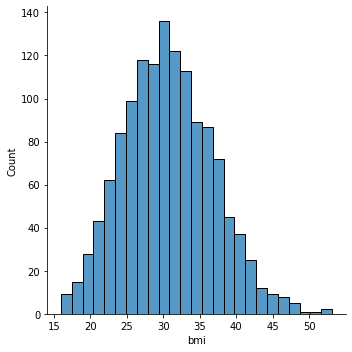

In [3]:
sns.displot(df.bmi, kind='hist')
plt.show()

# Charges VS Smoker type

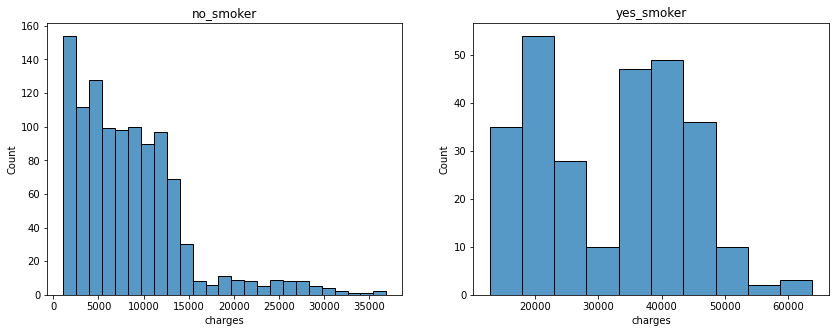

In [4]:
pl_num = len(dict(df['smoker'].value_counts()))
fig, ax = plt.subplots(1, pl_num,figsize = (14,5))
for i,j in enumerate(dict(df['smoker'].value_counts()).keys()):
    sns.histplot(df[df.smoker == j]['charges'],ax = ax[i])
    ax[i].set_title(j+'_smoker')

# Region Smoker type distribution

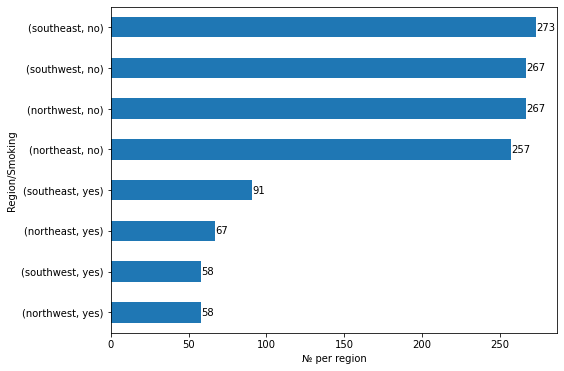

In [5]:
ax = df.groupby('region')['smoker'].value_counts().sort_values().plot(kind = 'barh',figsize = (8,6) )
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel('Region/Smoking')
plt.xlabel('№ per region')
plt.show()

# BMI distribution per sex

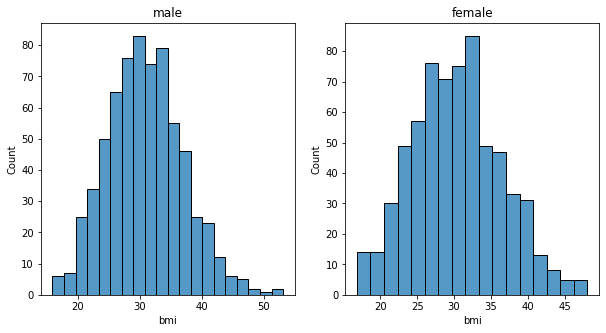

In [6]:
pl_num = len(dict(df['sex'].value_counts()))
fig, ax = plt.subplots(1, pl_num,figsize = (10,5))
for i,j in enumerate(dict(df['sex'].value_counts()).keys()):
    sns.histplot(df[df.sex == j]['bmi'],ax = ax[i])
    ax[i].set_title(j)

# Region with most children

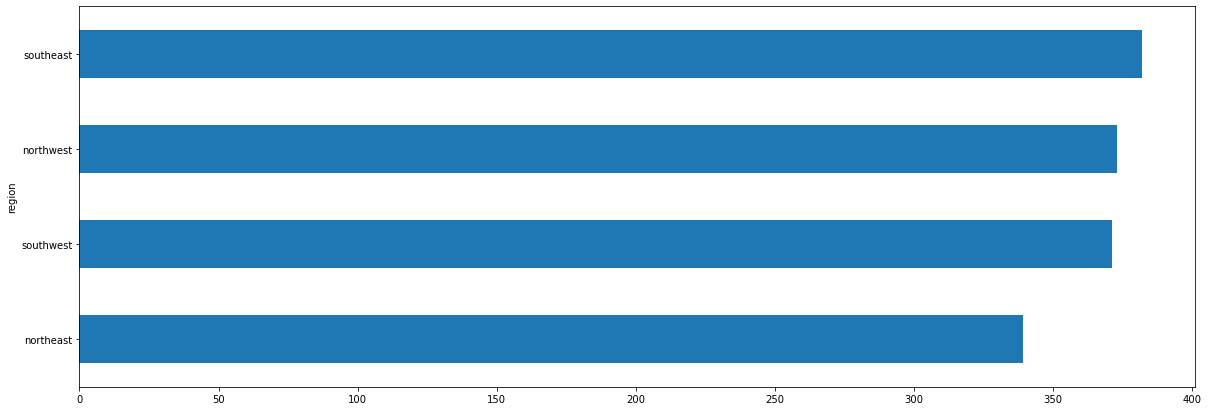

In [7]:
df.groupby('region')['children'].sum().sort_values().plot(kind="barh", figsize = (20, 7))
plt.show()

# Age VS BMI

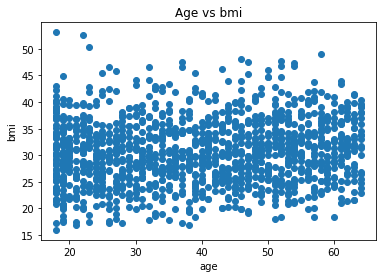

In [8]:
plt.scatter(df.age,df.bmi)
plt.xlabel("age")
plt.ylabel("bmi")
plt.title("Age vs bmi")
plt.show()

# BMI distribution per children

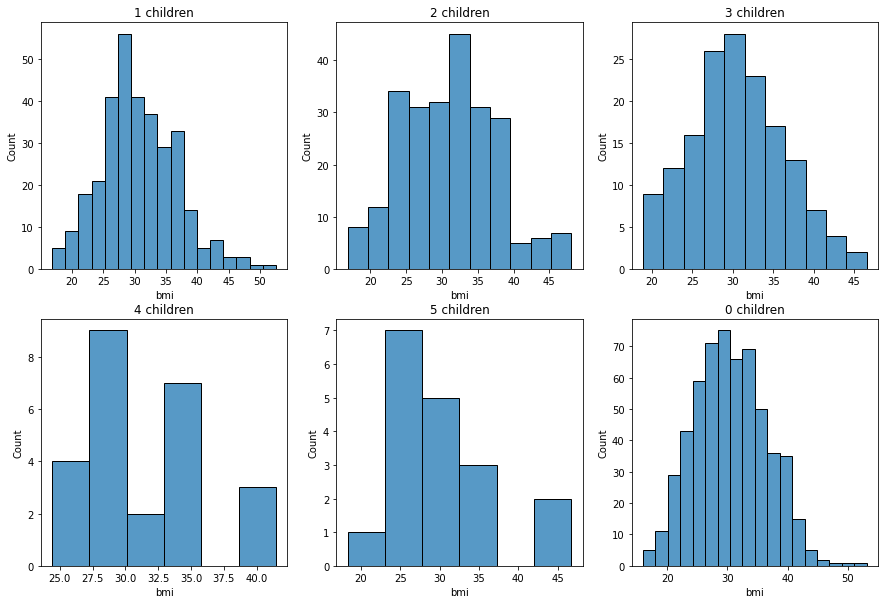

In [9]:
pl_num = len(dict(df['children'].value_counts()))
fig, ax = plt.subplots(int(np.ceil(pl_num / 3)), 3,figsize = (15,10))
for i,j in enumerate(dict(df['children'].value_counts()).keys()):
    sns.histplot(df[df.children == j]['bmi'],ax = ax[int(np.ceil(i / 3)) - 1,i % 3 - 1 ])
    ax[int(np.ceil(i / 3)) - 1,i % 3 - 1 ].set_title(str(j) + ' children')

# Outliers

In [10]:
bmi_description = df.bmi.describe()

In [11]:
bmi_mean = bmi_description[1]
bmi_std = bmi_description[2]

In [12]:
n_outliers = df[(df.bmi < bmi_mean - 3 * bmi_std) | (df.bmi > bmi_mean + 3 * bmi_std)].shape[0]
print(f"Bmi has {n_outliers} outliers.")

Bmi has 4 outliers.


# BMI VS Charges

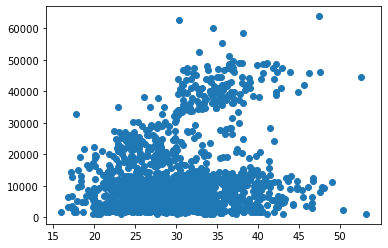

In [13]:
plt.scatter(df.bmi,df.charges)
plt.show()

# BMI per Region and Smoker type

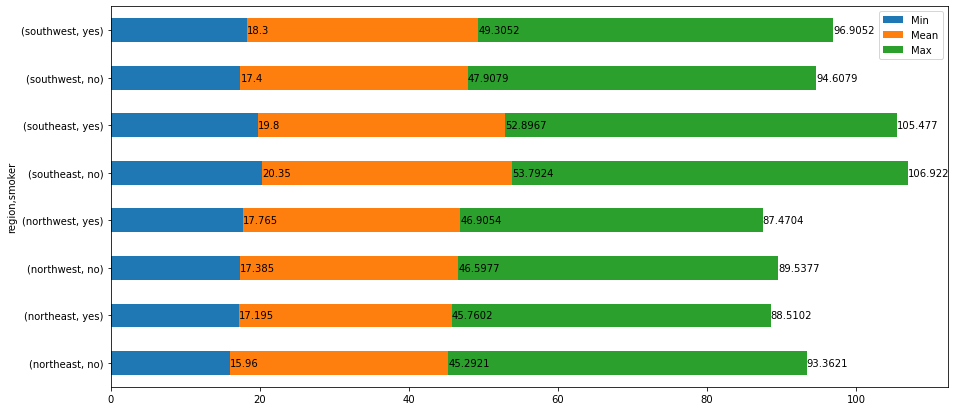

In [14]:
bar_plot = df.groupby(['region','smoker'])['bmi'].agg(Min = (np.min),Mean = (np.mean),
                                                      Max = (np.max)).plot(kind = 'barh',
                                                      figsize = (15,7), stacked = True)
for i in bar_plot.containers:
    bar_plot.bar_label(i)

# Data Preprocessing

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score

In [16]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
label_encoder = LabelEncoder()

df["sex"] = label_encoder.fit_transform(df["sex"]).reshape(-1, 1)
df["smoker"] = label_encoder.fit_transform(df["smoker"]).reshape(-1, 1)

In [18]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [19]:
one_hot_encoder = OneHotEncoder()
regions = pd.DataFrame(one_hot_encoder.fit_transform(df[["region"]]).toarray(), columns=one_hot_encoder.categories_[0])

In [20]:
df = pd.concat([df.drop(columns = "region"), regions], axis=1)

In [21]:
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0


In [22]:
X = df.drop(columns = 'charges').values
Y = df.charges
x_train, x_test, y_train,y_test = train_test_split(X,Y, test_size = 0.10, shuffle = True, random_state=42)

# Model 1. Logistic Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

## A. Normal Linear Regression

In [24]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_model.score(x_test, y_test)

0.7660412422965008

## B. Cross validation

In [25]:
np.mean(cross_val_score(lr_model, x_test, y_test))

0.6516937779174556

# Model 2. Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

## A. No Parameters Used

In [27]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
rf_model.score(x_test, y_test)

0.8388822485069101

## B. GridSearch

In [28]:
parameters = {
    "n_estimators":[100, 150, 200],
    "max_depth": [3, 6, 11, 17]
}
grid_search = GridSearchCV(rf_model, parameters)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 6, 11, 17],
                         'n_estimators': [100, 150, 200]})

In [29]:
grid_search.best_params_

{'max_depth': 6, 'n_estimators': 150}

In [30]:
grid_search.score(x_test, y_test)

0.8642341317256408

# Model 3. XGBoost

In [31]:
import xgboost as xgb

## A. Normal XGBRegressor

In [32]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train, y_train)
xgb_model.score(x_test, y_test)

0.8237998766963421

## B. GridSearch

In [33]:
parameters = {
    "n_estimators": [300, 500, 700],
    "learning_rate": [0.01, 0.02, 0.05, 0.1],
    "max_depth": [3,5,7,9,11]
}
xgb_model = xgb.XGBRegressor()
grid_search = GridSearchCV(xgb_model, parameters)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                   

In [34]:
grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

In [35]:
grid_search.score(x_test, y_test)

0.8754204553277951